In [23]:
import gc
import h5py
import quimb as qu
import pandas as pd
import quimb.tensor as qtn
import pickle
import numpy as np
from sklearn import svm
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [24]:
L = 5   # number of particle
ls_train = 20 # the scale of dividing the range of h and k for train part (including projected states)
ls_test = 20 # the scale of dividing the range of h and k for test part (including DMRG states)

In [25]:
gtrain = h5py.File('kernel_train_Haldane_DMRG_partial_from_0_to_4_spins.hdf5' ,'r')['gram_train_DMRG_partial'][:]
gtest = h5py.File('kernel_test_Haldane_DMRG_partial_from_0_to_4_spins.hdf5' ,'r')['gram_test_DMRG_partial'][:]

In [26]:
path = './train_set_DMRG and tragets.pkl'

with open(path, "rb") as f:
    target = pickle.load(f)[1]



In [27]:
clf = svm.SVC(kernel='precomputed')
y = target
clf.fit(gtrain, y) 
y_pred = clf.predict(gtest)

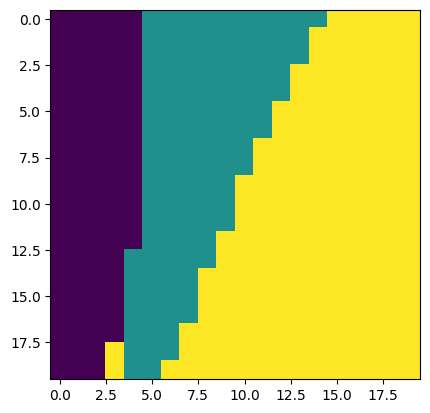

In [28]:
plt.imshow(y_pred.reshape(20,20))

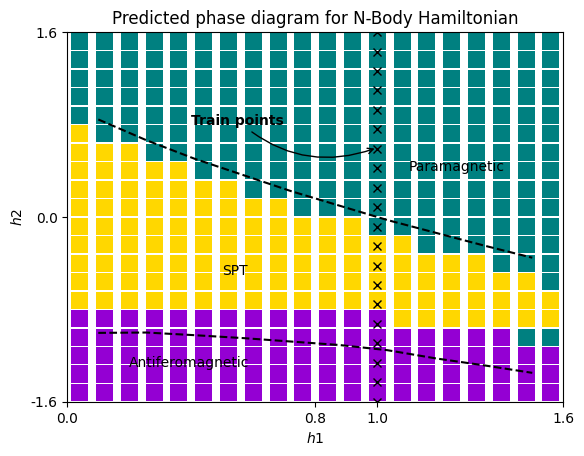

In [29]:
mat = y_pred.reshape(ls_train,ls_train) #   y = -1  Antiferromagnetic, y = 1  Paramagnetic, y = 0  SPT
r = mat.shape[0]
c = mat.shape[1]
dy = 3.2/r
dx = 1.6/c
#plt.scatter(1*(1.6/r)+dx/2,1*(3.2/c)+dy/2,marker = 's', color='black', label = 'Test points')

for i in range(r):
    for j in range(c):
        if mat[i,j] == 1:
            plt.scatter(i*(1.6/r)+dx/2,j*(3.2/c)+dy/2,marker = 's', color = 'teal',s=150, edgecolors='none')
        elif mat[i,j] == 0:
            plt.scatter(i*(1.6/r)+dx/2,j*(3.2/c)+dy/2,marker = 's', color ='gold',s =150,  edgecolors='none')
        elif mat[i,j] == -1:
            plt.scatter(i*(1.6/r)+dx/2,j*(3.2/c)+dy/2, marker = 's', color = 'darkviolet', s=150,  edgecolors='none')

x_train = np.ones(2*10)
y_train = np.linspace(0,3.2,2*10)
#plt.plot(x_train[0],y_train[0], 'o',color= 'rosybrown', label = 'Train points')
plt.plot(x_train, y_train,'x', color= 'black')
plt.xlim([0.0,1.6])
plt.ylim([0.0,3.2])
plt.xticks([0,0.8, 1.0 ,1.6])
plt.yticks([0.0,1.6,3.2],[-1.6,0.0,1.6])
plt.text(1.1,2,'Paramagnetic', fontsize = 10)
plt.text(0.5,1.1,'SPT', fontsize = 10)
plt.text(0.2,0.3,'Antiferomagnetic', fontsize = 10)
plt.annotate('Train points',xy=(1.0,2.2), xytext=(0.55,2.4), arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.3'} ,horizontalalignment='center', weight = 'bold')

h1_vals = [0.1000, 0.2556, 0.4111, 0.5667, 0.7222, 0.8778, 1.0333, 1.1889, 1.3444, 1.5000]
anti_ferro_mag_boundary = np.array([-1.004, -1.0009, -1.024, -1.049, -1.079, -1.109, -1.154,  -1.225, -1.285, -1.35])+np.ones(10)*1.6
para_mag_boundary = np.array([0.8439, 0.6636, 0.5033, 0.3631, 0.2229, 0.09766, -0.02755, -0.1377, -0.2479, -0.3531])+np.ones(10)*1.6

plt.plot(h1_vals, anti_ferro_mag_boundary, "--", color = 'black', label="Antiferromagnetics")
plt.plot(h1_vals, para_mag_boundary, "--", color = 'black', label="Paramagnetic")

plt.xlabel('$h1$')
plt.ylabel('$h2$')
plt.title('Predicted phase diagram for N-Body Hamiltonian')
plt.savefig('phasediagram.png')

plt.show()



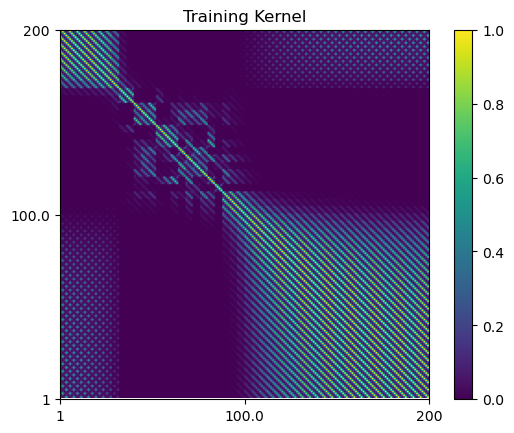

In [7]:
plt.imshow(gtrain,cmap="viridis");
d = gtrain.shape[0];
plt.xticks([-0.5, (d/2), (d)], [f"{1}", f"{(d/2)}", f"{(d)}"]);
plt.yticks([-0.5, (d/2), (d)], [f"{(d)}", f"{(d/2)}", f"{1}"]);
plt.title("Training Kernel")
plt.colorbar();
plt.savefig('Training Kernel.png')
plt.show();

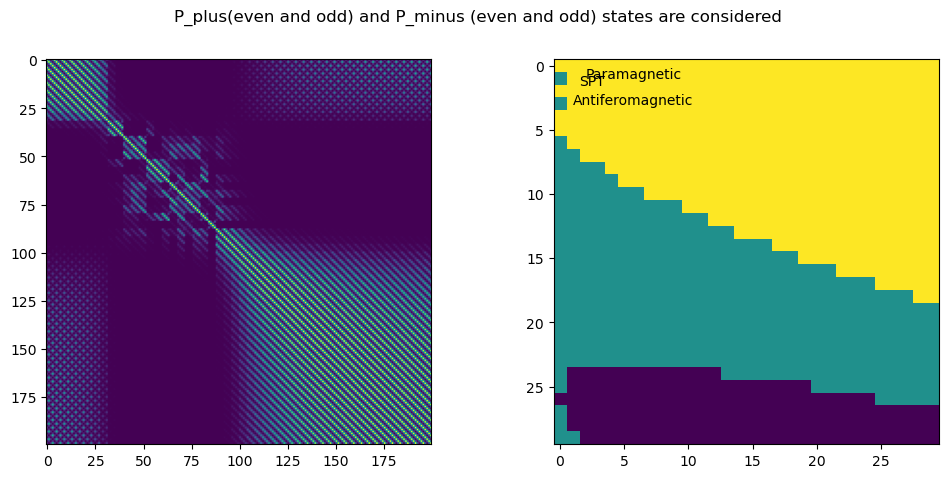

In [8]:
fig, ax = plt.subplots(1,2,figsize = (12,5))
ax[0].imshow(gtrain)
mat = y_pred.reshape(ls_train,ls_train)
ax[1].imshow(np.rot90(mat))
ax[1].text(2,1,'Paramagnetic')
ax[1].text(1.5,1.5,'SPT')
ax[1].text(1,3,'Antiferomagnetic')
fig.suptitle('P_plus(even and odd) and P_minus (even and odd) states are considered')
plt.show()